<a href="https://colab.research.google.com/github/Toomishe/LEVERAGING-BIG-DATA-ANALYTICS-FOR-INFORMED-RELOCATION-DECISION-MAKING/blob/main/Final_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Final Project**

In [ ]:
!pip install requests
!pip install dash

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load Other Datasets**


In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [ ]:
# Load salary data
salary_data = pd.read_excel('/content/drive/MyDrive/Big Data Analytics/Dataset/Salary.xlsx')

# Load Transportation data
transport_data = pd.read_excel('/content/drive/MyDrive/Big Data Analytics/Dataset/Transportation.xlsx')

# Load Rent data
house_rent_data = pd.read_excel('/content/drive/MyDrive/Big Data Analytics/Dataset/House(Rent).xlsx')

# Load Tax data
tax_data = pd.read_excel('/content/drive/MyDrive/Big Data Analytics/Dataset/Tax.xlsx')

# Load House mortgage data
house_buy_mortgage_data = pd.read_excel('/content/drive/MyDrive/Big Data Analytics/Dataset/House (Buy_Mortgage).xlsx')

# Load Healthcare data
healthcare_data = pd.read_excel('/content/drive/MyDrive/Big Data Analytics/Dataset/Healthcare.xlsx')

# Load Food data
food_data = pd.read_excel('/content/drive/MyDrive/Big Data Analytics/Dataset/Food.xlsx')

# Load Cost of Living Index data
coli_data = pd.read_excel('/content/drive/MyDrive/Big Data Analytics/Dataset/COLI.xlsx')

# Load Cost of Living A data
cola_data = pd.read_excel('/content/drive/MyDrive/Big Data Analytics/Dataset/COLA.xlsx')


In [ ]:
# Merge datasets into a single table based on 'State'
merged_data = pd.merge(salary_data, transport_data, on='State')
merged_data = pd.merge(merged_data, house_rent_data, on='State')
merged_data = pd.merge(merged_data, tax_data, on='State')
merged_data = pd.merge(merged_data, house_buy_mortgage_data, on='State')
merged_data = pd.merge(merged_data, healthcare_data, on='State')
merged_data = pd.merge(merged_data, food_data, on='State')
merged_data = pd.merge(merged_data, coli_data.groupby('State')['Cost of Living Index'].mean().reset_index(), on='State')
merged_data = pd.merge(merged_data, cola_data, on='State')

# Convert to DataFrame
final_dataframe = pd.DataFrame(merged_data)

# Display the first few rows of the merged DataFrame
final_dataframe.head(5)

,Salary Rank,State,Annual Average Wage,Transport Rank,Annual Average Transportation Cost,Rent Rank,Rent Price,Tax Rank,Average Annual Taxes,House BM Rank,Median Home Price,Annual Mortgage Payment,Healthcare Rank,Annual Healthcare Cost,Total Annual Food Cost,Cost of Living Index,Total Cost of Living,Total Cost Of Living Ranking,Total Disposable Income,Disposable Income Ranking
0,46,Alabama,50620,38,5039,39,1062,26,4733,41,223246,16008,40,8788.00,3785,89.366667,33654,48,16966,33
1,19,Arizona,58620,26,5273,15,1490,19,5015,14,420494,30156,46,8239.00,4770,100.387500,39856,24,18764,21
2,49,Arkansas,48570,36,5050,42,1008,40,4382,47,199636,14316,35,8912.00,3745,86.037500,32979,49,15591,40
3,3,California,73220,2,6597,2,1956,6,6312,2,743362,53304,24,9665.33,5262,125.746667,53171,3,20049,15
4,8,Colorado,67870,9,5709,9,1626,9,5859,5,543143,38940,44,8289.00,4714,108.300000,45931,11,21939,8


**Data Visualization**

In [ ]:
# Visualize each category
# Example: Bar plot for Average Annual Wage by State
fig_salary = px.bar(merged_data, x='State', y='Annual Average Wage', title='Average Annual Wage by State')
fig_salary

**Machine Learning Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create a machine learning model to predict best states
# For simplicity, let's predict the Annual Average Wage based on other features
X = merged_data.drop(['Annual Average Wage', 'State'], axis=1)
y = merged_data['Annual Average Wage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy}')


Model Accuracy: 0.882667254227571


**Data Pre-processing**

In [ ]:
final_dataframe_minusrank = final_dataframe.drop(columns = ['Salary Rank','Transport Rank','Rent Rank','Tax Rank','House BM Rank','Healthcare Rank', 'Disposable Income Ranking', 'Total Cost Of Living Ranking'])
final_dataframe_minusrank.head(5)

,State,Annual Average Wage,Annual Average Transportation Cost,Rent Price,Average Annual Taxes,Median Home Price,Annual Mortgage Payment,Annual Healthcare Cost,Total Annual Food Cost,Cost of Living Index,Total Cost of Living,Total Disposable Income
0,Alabama,50620,5039,1062,4733,223246,16008,8788.00,3785,89.366667,33654,16966
1,Arizona,58620,5273,1490,5015,420494,30156,8239.00,4770,100.387500,39856,18764
2,Arkansas,48570,5050,1008,4382,199636,14316,8912.00,3745,86.037500,32979,15591
3,California,73220,6597,1956,6312,743362,53304,9665.33,5262,125.746667,53171,20049
4,Colorado,67870,5709,1626,5859,543143,38940,8289.00,4714,108.300000,45931,21939


In [ ]:
column_names_minusrank = list(final_dataframe_minusrank)
column_names_minusrank

['State',
 'Annual Average Wage',
 'Annual Average Transportation Cost',
 'Rent Price',
 'Average Annual Taxes',
 'Median Home Price',
 'Annual Mortgage Payment',
 'Annual Healthcare Cost',
 'Total Annual Food Cost',
 'Cost of Living Index',
 'Total Cost of Living',
 'Total Disposable Income']

In [ ]:
# Rename the column 'name'
final_dataframe_minusrank.rename(columns={'Annual Average Wage':'Income','Annual Mortgage Payment':' Mortgage','Annual Healthcare Cost':' Healthcare','Total Annual Food Cost': ' Food','Total Disposable Income':'Disposable Income','Cost of Living Index': 'COLI','Total Cost of Living':'COL','Annual Average Transportation Cost': 'Transportation','Rent Price': 'Rent', 'Average Annual Taxes': 'Tax', 'Median Home Price': ' Home Price'}, inplace=True)
final_dataframe_minusrank.head(5)

,State,Income,Transportation,Rent,Tax,Home Price,Mortgage,Healthcare,Food,COLI,COL,Disposable Income
0,Alabama,50620,5039,1062,4733,223246,16008,8788.00,3785,89.366667,33654,16966
1,Arizona,58620,5273,1490,5015,420494,30156,8239.00,4770,100.387500,39856,18764
2,Arkansas,48570,5050,1008,4382,199636,14316,8912.00,3745,86.037500,32979,15591
3,California,73220,6597,1956,6312,743362,53304,9665.33,5262,125.746667,53171,20049
4,Colorado,67870,5709,1626,5859,543143,38940,8289.00,4714,108.300000,45931,21939


In [ ]:
final_dataframe_minusrank.columns

Index(['State', 'Income', 'Transportation', 'Rent', 'Tax', ' Home Price',
       ' Mortgage', ' Healthcare', ' Food', 'COLI', 'COL',
       'Disposable Income'],
      dtype='object')

**Cost of Living Calculation and Visualization**

Index(['State', 'Income', 'Transportation', 'Rent', 'Tax', ' Home Price',
       ' Mortgage', ' Healthcare', ' Food', 'COLI', 'COL',
       'Disposable Income'],
      dtype='object')


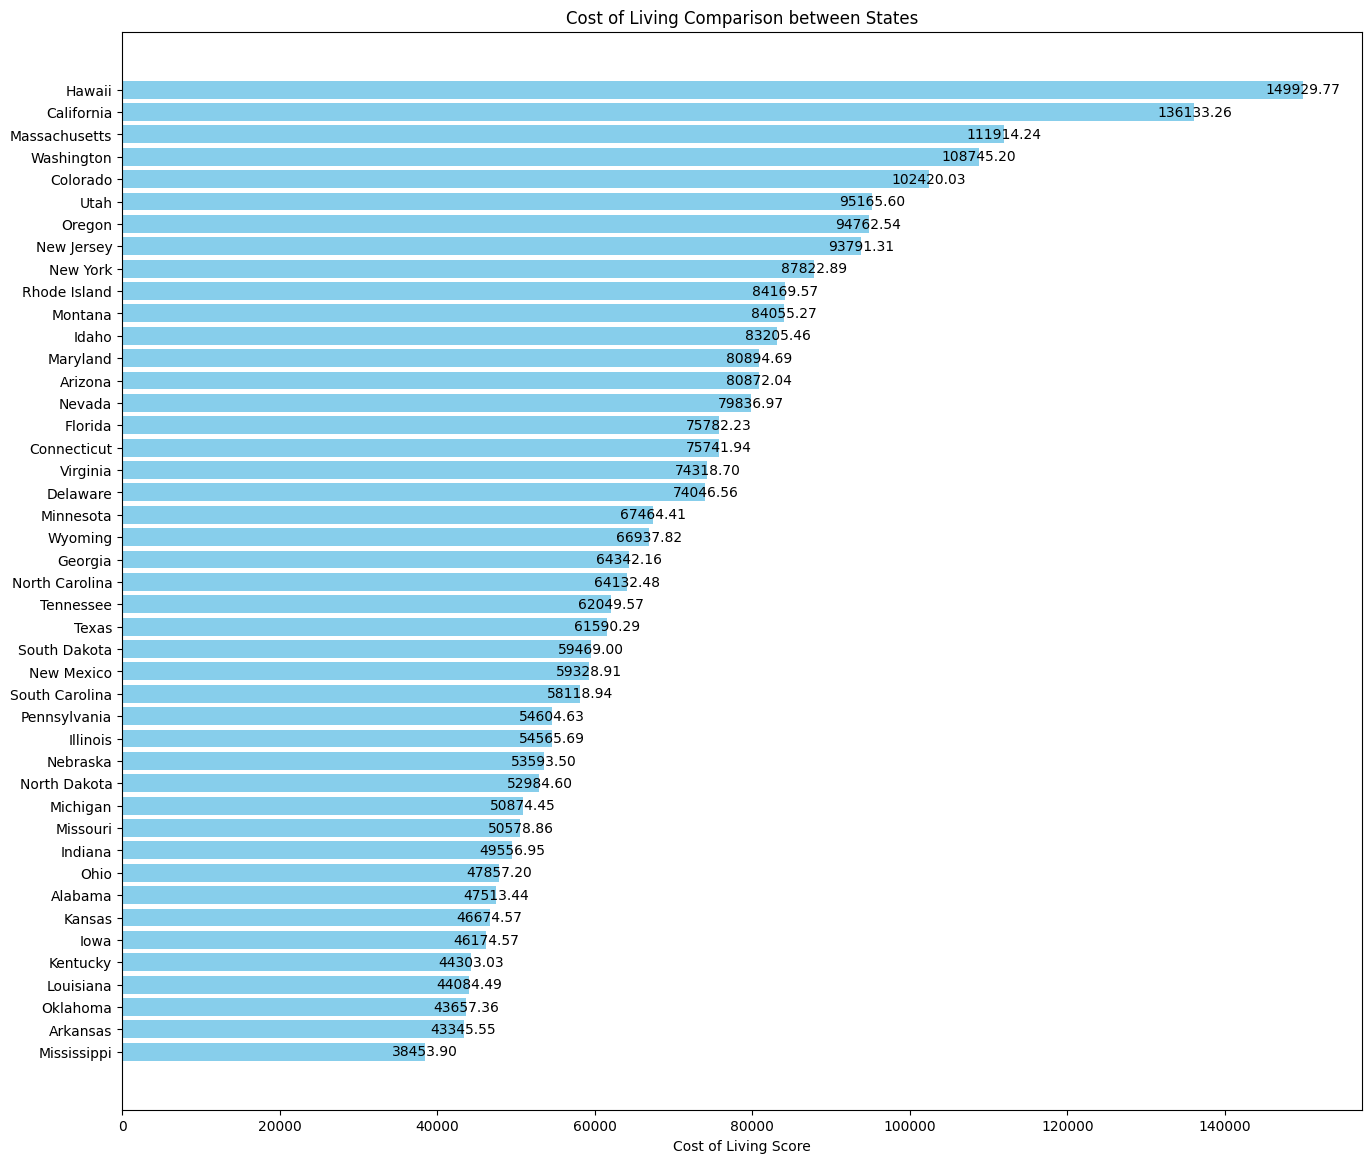

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'final_dataframe_minusrank'
print(final_dataframe_minusrank.columns)  # Print column names to check for correctness

# Replace column names in the weights dictionary with the actual column names
weights = {
    'Income': 0.1,
    'Transportation': 0.1,
    'Rent': 0.1,
    'Tax': 0.1,
    ' Home Price': 0.15,
    ' Mortgage': 0.15,
    ' Healthcare': 0.1,
    ' Food': 0.1,
    'COLI': 0.1,
    'COL':0.1,
    'Disposable Income': 0.05,
}

try:
    # Step 2: Normalize the data for each factor
    normalized_data = final_dataframe_minusrank.copy()

    # Step 3: Calculate the cost of living for each state
    normalized_data['Cost of Living'] = normalized_data[list(weights.keys())].mul(weights.values()).sum(axis=1)

    # Step 4: Rank the states based on the cost of living
    ranked_states = normalized_data.sort_values(by='Cost of Living')

    # Step 5: Visualize the results using horizontal bar chart

    # Visualize each category
    plt.figure(figsize=(16, 14))
    bars = plt.barh(ranked_states['State'], ranked_states['Cost of Living'], color='skyblue')
    # Annotate each bar with its cost of living score
    for bar in bars:
        plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', ha='center', va='center')
    plt.xlabel('Cost of Living Score')
    plt.title('Cost of Living Comparison between States')
    plt.show()

except KeyError as e:
    print(f"Error: One or more columns in the weights dictionary not found in the DataFrame. Missing column: {e}")


**Interactive Prompt that accept user input (two states) and provide relocation advise based on relocation factors comparison**




In [ ]:
# import pandas as pd
# import dash
# from dash import dcc, html
# from dash.dependencies import Input, Output
# from tabulate import tabulate

# def compare_cost_of_living(df, state1, state2):
#     try:
#         # Check if the entered states exist in the DataFrame
#         state1, state2 = state1.capitalize(), state2.capitalize()  # Make the comparison case-insensitive
#         if state1 not in df['State'].values or state2 not in df['State'].values:
#             print("Error: One or more entered states not found in the DataFrame.")
#             return

#         # Extract data for the entered states
#         data_state1 = df.loc[df['State'] == state1].squeeze()
#         data_state2 = df.loc[df['State'] == state2].squeeze()

#         # Display values for all factors in a table
#         factors_table = pd.DataFrame({
#             'Factor': df.columns[1:],
#             state1: data_state1.values[1:],
#             state2: data_state2.values[1:]
#         })

#         print("\nAnnual average of primary relocation factors for both states:")
#         print(tabulate(factors_table, headers='keys', tablefmt='pretty', showindex=False))

#         # Compare cost of living scores and provide advice
#         if data_state1['Cost of Living'] < data_state2['Cost of Living']:
#             print(f"\nConclusion: {state1} is more affordable than {state2}.")
#         elif data_state1['Cost of Living'] > data_state2['Cost of Living']:
#             print(f"\nConclusion: {state2} is more affordable than {state1}.")
#         else:
#             print(f"\nConclusion: {state1} and {state2} have similar cost of living.")

#     except KeyError as e:
#         print(f"Error: One or more columns in the DataFrame not found. Missing column: {e}")

# # Replace 'state1' and 'state2' with the states you want to compare
# state1 = input("Enter the first state: ")
# state2 = input("Enter the second state: ")

# compare_cost_of_living(normalized_data, state1, state2)


In [ ]:
!pip install dash plotly

In [ ]:
import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
from tabulate import tabulate
import plotly.express as px

# Assume 'normalized_data' is already defined

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    # Dashboard header
    html.H1("Annual Average of Primary Relocation Factors for Both States", style={'textAlign': 'center', 'color': '#CED2CC', 'background-color': '#1C4E80', 'padding':'10px'}),

   # Input fields and button in a row
    html.Div([
        # Input field for the first state
        dcc.Dropdown(
            id='state1-input',
            options=[{'label': state, 'value': state} for state in normalized_data['State']],
            placeholder='Select the first state',
            style={'margin-right': '10px', 'width':'40%'}
        ),

        # Input field for the second state
        dcc.Dropdown(
            id='state2-input',
            options=[{'label': state, 'value': state} for state in normalized_data['State']],
            placeholder='Select the second state',
            style={'margin-right': '10px', 'width':'40%'}
        ),
    ], style={'display': 'flex', 'justify-content': 'center', 'align-items': 'center', 'margin-bottom': '20px'}),
  # Button to trigger comparison
    html.Button('Compare Cost of Living', id='compare-button', n_clicks=0),

    # Output for displaying comparison result
    html.Div([
        # Table and Home Price chart on the same row
        html.Div([
            # Table for displaying values for all factors
            html.Div(id='values-table', style={'width': '40%', 'display': 'inline-block', 'vertical-align': 'top', 'margin-right': '5%'}),

            # Home Price chart
            dcc.Graph(id='home-price-chart', style={'width': '55%', 'display': 'inline-block'}),
        ]),

        # Main chart on the next row
        dcc.Graph(id='main-chart', style={'width': '100%'}),

        # Comparison conclusion
        html.Div(id='comparison-conclusion', style={'margin-top': '20px', 'color': 'green', 'font-weight': 'bold'})
    ])
])

# Define the callback to update the displayed comparison result
@app.callback(
    [Output('values-table', 'children'),
     Output('main-chart', 'figure'),
     Output('home-price-chart', 'figure'),
     Output('comparison-conclusion', 'children')],
    [Input('compare-button', 'n_clicks')],
    [dash.dependencies.State('state1-input', 'value'),
     dash.dependencies.State('state2-input', 'value')]
)
def update_comparison(n_clicks, state1, state2):
    try:
        if n_clicks > 0:
            # Check if the entered states exist in the DataFrame
            state1, state2 = state1.capitalize(), state2.capitalize()  # Make the comparison case-insensitive
            if state1 not in normalized_data['State'].values or state2 not in normalized_data['State'].values:
                return "Error: One or more entered states not found in the DataFrame.", {}, {}

            # Extract data for the entered states
            data_state1 = normalized_data.loc[normalized_data['State'] == state1].squeeze()
            data_state2 = normalized_data.loc[normalized_data['State'] == state2].squeeze()

            # Compare cost of living scores and provide advice
            if data_state1['Cost of Living'] < data_state2['Cost of Living']:
                conclusion = f"Conclusion: {state1} is more affordable than {state2}."
            elif data_state1['Cost of Living'] > data_state2['Cost of Living']:
                conclusion = f"Conclusion: {state2} is more affordable than {state1}."
            else:
                conclusion = f"Conclusion: {state1} and {state2} have similar cost of living."


            # Display values for all factors in a table
            factors_table = pd.DataFrame({
                'Factor': normalized_data.columns[1:],
                state1: data_state1.values[1:],
                state2: data_state2.values[1:]
            })

            # Table styling
            table_style = {
                'width': '100%',
                'border-collapse': 'collapse',
                'border': '1px solid #ddd',
                'text-align': 'left'
            }

            header_style = {
                'background-color': '#f2f2f2',
                'padding': '8px',
                'border-bottom': '1px solid #ddd'
            }

            row_style = {
                'padding': '8px',
                'border-bottom': '1px solid #ddd'
            }

            # Main chart without 'Home Price' and 'COLI'
            main_factors = factors_table[~factors_table['Factor'].isin([' Home Price', 'COLI'])]

            # Home Price chart
            fig_home_price = px.bar(
                factors_table[factors_table['Factor'] == ' Home Price'].melt(id_vars='Factor'),
                x='variable',
                y='value',
                color='variable',
                title=f'Home Price Comparison Between {state1} and {state2}',
                height=400
            )

            # Update y-axis step to 50,000
            fig_home_price.update_layout(
                yaxis=dict(
                    tickmode='linear',
                    tick0=0,
                    dtick=50000,
                    title='Home Price'
                )
            )

            # Main chart
            fig_main = px.bar(
                main_factors.melt(id_vars='Factor'),
                x='Factor',
                y='value',
                color='variable',
                barmode='group',
                title=f'Comparison of Factors Between {state1} and {state2}',
                height=600
            )

            # Update y-axis step to 10,000
            fig_main.update_layout(
                yaxis=dict(
                    tickmode='linear',
                    tick0=0,
                    dtick=10000,
                    title='Value'
                )
            )

            return (
                html.Table(
                    # Header
                    [html.Tr([html.Th(col, style=header_style) for col in factors_table.columns])] +
                    # Body
                    [html.Tr([html.Td(factors_table.iloc[i][col], style=row_style) for col in factors_table.columns]) for i in range(len(factors_table))],
                    style=table_style
                ),

                fig_main,
                fig_home_price,
                conclusion

            )

    except Exception as e:
        return f"Error in callback: {str(e)}", {}, {}

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

**Interactive Prompt that accept two user inputs (two states) and (user annual income) and provide relocation advise based on relocation factors comparison**

In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd
from tabulate import tabulate
from sklearn.linear_model import LinearRegression

#enter_income

def enter_income():
    try:
        income = float(input("Enter your annual income: "))
        return income
    except ValueError:
        print("Error: Please enter a valid numerical value for income.")
        return None

def train_prediction_model(df, features, target):
    # Extract features (X) and target variable (y)
    X = df[features].values.reshape(-1, 1)  # Reshape to 2D array
    y = df[target].values

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    return model

def estimate_factors(model, cost_of_living):
    # Predict values of other factors based on cost of living
    predicted_factors = model.predict([[cost_of_living]])
    return predicted_factors[0]

def compare_cost_of_living(df, income, state1, state2):
    try:
        # Check if the entered states exist in the DataFrame
        state1, state2 = state1.capitalize(), state2.capitalize()  # Make the comparison case-insensitive
        if state1 not in df['State'].values or state2 not in df['State'].values:
            print("Error: One or more entered states not found in the DataFrame.")
            return

        # Train a prediction model for estimating factors
        features = ['Cost of Living']
        target_factors = df.columns[1:]  # Excluding 'State' and 'Cost of Living'
        models = {factor: train_prediction_model(df, features, factor) for factor in target_factors}

        # Display estimated values in a table
        factors_table = {'Factor': [], state1: [], state2: []}
        for factor, model in models.items():
            estimated_state1 = estimate_factors(model, df.loc[df['State'] == state1, 'Cost of Living'].values[0])
            estimated_state2 = estimate_factors(model, df.loc[df['State'] == state2, 'Cost of Living'].values[0])

            factors_table['Factor'].append(factor)
            factors_table[state1].append(estimated_state1)
            factors_table[state2].append(estimated_state2)

        print("\nEstimated Values of Other Factors:")
        print(tabulate(factors_table, headers='keys', tablefmt='pretty', showindex=False))

# (previous code)

        # Compare disposable incomes and provide advice
        disposable_income_state1 = income - factors_table[state1][factors_table['Factor'].index('Income')] * (income / df.loc[df['State'] == state1, 'Income'].values[0])
        disposable_income_state2 = income - factors_table[state2][factors_table['Factor'].index('Income')] * (income / df.loc[df['State'] == state2, 'Income'].values[0])

        if disposable_income_state1 < disposable_income_state2:
            print(f"\nAdvice: Based on your income, you can afford to live in {state2}.")
        elif disposable_income_state1 > disposable_income_state2:
            print(f"\nAdvice: Based on your income, you can afford to live in {state1}.")
        else:
            print(f"\nAdvice: Both {state1} and {state2} are expected to have similar affordability based on your income.")


    except KeyError as e:
        print(f"Error: One or more columns in the DataFrame not found. Missing column: {e}")

# Example usage:
user_income = enter_income()
if user_income is not None:
    # Replace 'state1' and 'state2' with the states you want to compare
    state1 = input("Enter the first state: ")
    state2 = input("Enter the second state: ")

    compare_cost_of_living(normalized_data, user_income, state1, state2)


Enter your annual income: 80000
Enter the first state: Maryland
Enter the second state: Texas

Estimated Values of Other Factors:
+-------------------+--------------------+--------------------+
|      Factor       |      Maryland      |       Texas        |
+-------------------+--------------------+--------------------+
|      Income       | 60854.55728855489  | 56684.205212925706 |
|  Transportation   | 5484.943540489536  | 5197.506380769584  |
|       Rent        | 1448.7524276239292 | 1232.5479663268147 |
|        Tax        | 5329.502580298531  | 4804.045543541177  |
|    Home Price     | 416695.2666843491  | 302723.69888930634 |
|     Mortgage      | 29877.887408460243 | 21703.791935099984 |
|    Healthcare     | 9727.800874630117  | 9608.814364880669  |
|       Food        | 4465.457784782196  | 4109.928645097342  |
|       COLI        | 102.34361902263339 | 93.45776364768972  |
|        COL        | 42493.164202213375 | 38378.07722614439  |
| Disposable Income | 18361.3930863415

**Interactive Dashboard that compares two states based on relocation factors comparison**

In [ ]:
import pandas as pd
import dash
from dash import dcc, html, dash_table
from dash.dependencies import Input, Output
from sklearn.linear_model import LinearRegression



# Train the prediction model
def train_prediction_model(df, features, target):
    X = df[features].values.reshape(-1, 1)
    y = df[target].values
    model = LinearRegression()
    model.fit(X, y)
    return model

# Estimate factors based on cost of living
def estimate_factors(model, cost_of_living):
    predicted_factors = model.predict([[cost_of_living]])
    return predicted_factors[0]

# Initialize the Dash app
app2 = dash.Dash(__name__)

# Train the prediction model
features = ['Cost of Living']
target_factors = normalized_data.columns[1:]  # Assuming the columns are the factors
models = {factor: train_prediction_model(normalized_data, features, factor) for factor in target_factors}

# Define the layout of the app
app2.layout = html.Div([
    # Dropdowns for state selection
    html.Label('Select the first state:'),
    dcc.Dropdown(
        id='state-dropdown1',
        options=[{'label': state, 'value': state} for state in final_dataframe_minusrank['State']],
        value=final_dataframe_minusrank['State'][0],  # Default selected state
        multi=False
    ),
    html.Label('Select the second state:'),
    dcc.Dropdown(
        id='state-dropdown2',
        options=[{'label': state, 'value': state} for state in final_dataframe_minusrank['State']],
        value=final_dataframe_minusrank['State'][1],  # Default selected state
        multi=False
    ),
    # Output for displaying factors
    dash_table.DataTable(
        id='factors-output',
        columns=[
            {'name': 'Factor', 'id': 'Factor'},
            {'name': 'Estimated Value 1', 'id': 'Estimated Value 1'},
            {'name': 'Estimated Value 2', 'id': 'Estimated Value 2'}
        ],
        style_table={'overflowX': 'auto'},
        data=[]  # Initialize with an empty array
    )
])

# Define the callback to update the displayed factors based on the selected states
@app.callback(
    Output('factors-output', 'data'),
    [Input('state-dropdown1', 'value'),
     Input('state-dropdown2', 'value')]
)
def update_factors(selected_state1, selected_state2):
    try:
        if selected_state1 is None:
            selected_state1 = final_dataframe_minusrank['State'][0]  # Default selected state

        if selected_state2 is None:
            selected_state2 = final_dataframe_minusrank['State'][1]  # Default selected state

        selected_state1 = selected_state1.capitalize()
        selected_state2 = selected_state2.capitalize()

        if selected_state1 not in normalized_data['State'].values or selected_state2 not in normalized_data['State'].values:
            return []

        factors_table = {'Factor': [], 'Estimated Value 1': [], 'Estimated Value 2': []}
        for factor, model in models.items():
            estimated_value1 = estimate_factors(model, normalized_data.loc[normalized_data['State'] == selected_state1, 'Cost of Living'].values[0])
            estimated_value2 = estimate_factors(model, normalized_data.loc[normalized_data['State'] == selected_state2, 'Cost of Living'].values[0])

            factors_table['Factor'].append(factor)
            factors_table['Estimated Value 1'].append(estimated_value1)
            factors_table['Estimated Value 2'].append(estimated_value2)

        return [{'Factor': factor, 'Estimated Value 1': value1, 'Estimated Value 2': value2} for factor, value1, value2 in zip(factors_table['Factor'], factors_table['Estimated Value 1'], factors_table['Estimated Value 2'])]

    except Exception as e:
        print(f"Error in callback: {e}")
        return []

# Run the app
if __name__ == '__main__':
    app2.run_server(debug=True)


_________________________